In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.pipeline as Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
%matplotlib inline

In [2]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [3]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv')
data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Examining the Data
data.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
data.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data.shape

(21613, 22)

In [7]:
data.corr()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Unnamed: 0,1.000000,0.006718,0.027372,0.010308,0.107013,0.044717,-0.026877,0.179138,-0.007611,-0.013751,...,0.082050,0.071958,-0.041841,0.199549,-0.025601,-0.002199,0.000701,0.008649,0.026647,-0.029827
id,0.006718,1.000000,-0.016762,0.001332,0.005234,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,0.027372,-0.016762,1.000000,0.308890,0.525885,0.702035,0.089661,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.010308,0.001332,0.308890,1.000000,0.514508,0.578405,0.032325,0.178178,-0.006800,0.080079,...,0.357145,0.479593,0.302896,0.155792,0.018456,-0.153764,-0.009739,0.131066,0.393560,0.030473
bathrooms,0.107013,0.005234,0.525885,0.514508,1.000000,0.755789,0.087932,0.502462,0.063744,0.188390,...,0.665887,0.686735,0.283456,0.507013,0.050561,-0.204852,0.024253,0.225103,0.569787,0.087544
sqft_living,0.044717,-0.012258,0.702035,0.578405,0.755789,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.026877,-0.132109,0.089661,0.032325,0.087932,0.172826,1.000000,-0.005201,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.179138,0.018525,0.256794,0.178178,0.502462,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.007611,-0.002721,0.266369,-0.006800,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,-0.013751,0.011592,0.397293,0.080079,0.188390,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


In [8]:
data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
#Data Wrangling - removing unneccesary columns & identifying the null values
data.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
data.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [11]:
bedroom_mean = data['bedrooms'].mean()
data['bedrooms'].replace(np.nan, bedroom_mean, inplace=True)
data['bedrooms'].isnull().sum()

0

In [12]:
bathroom_mean = data['bathrooms'].mean()
data['bathrooms'].replace(np.nan, bathroom_mean, inplace=True)
data['bathrooms'].isnull().sum()

0

In [13]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
#Exploratory Data Analysis
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308797,0.525738,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308797,1.000000,0.514194,0.578077,0.032307,0.178022,-0.006800,0.080058,0.026690,0.356589,0.479286,0.302856,0.155749,0.018456,-0.153736,-0.009735,0.130978,0.393356,0.030430
bathrooms,0.525738,0.514194,1.000000,0.755371,0.087929,0.502132,0.063744,0.188341,-0.126197,0.664676,0.686309,0.283428,0.506913,0.050560,-0.204819,0.024246,0.224922,0.569467,0.087539
sqft_living,0.702035,0.578077,0.755371,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.032307,0.087929,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.178022,0.502132,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006800,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.080058,0.188341,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.026690,-0.126197,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356589,0.664676,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [15]:
data['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

<AxesSubplot:xlabel='floors', ylabel='price'>

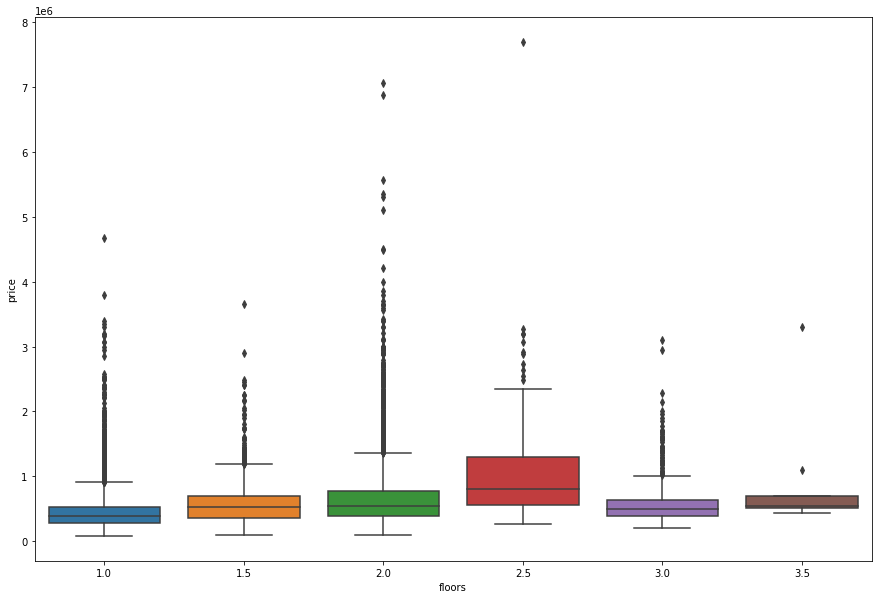

In [16]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='floors', y='price', data=data)

In [17]:
data['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

<AxesSubplot:xlabel='waterfront', ylabel='price'>

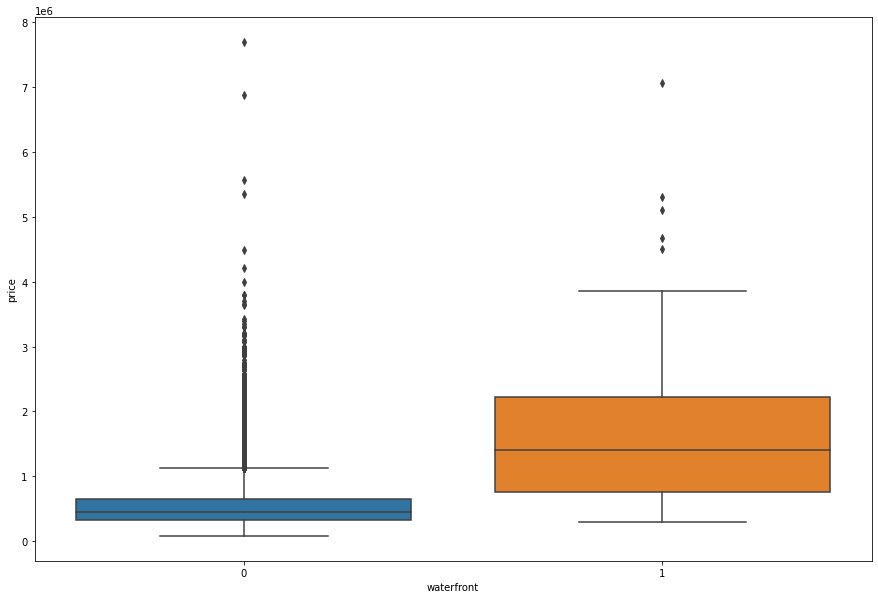

In [18]:
width = 15
height = 10
plt.figure(figsize=(width, height))
sns.boxplot(x='waterfront', y='price', data=data)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

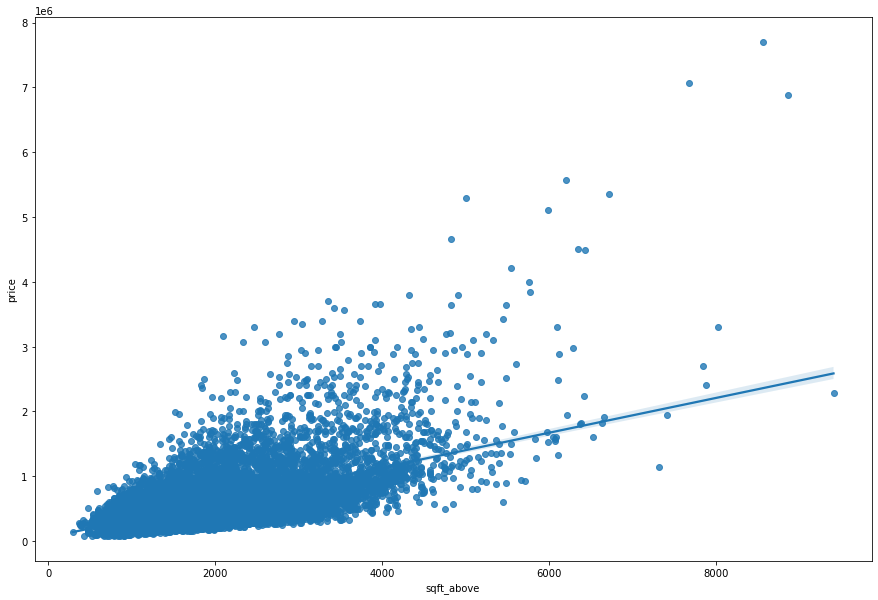

In [19]:
plt.figure(figsize=(width, height))
sns.regplot(x='sqft_above', y='price', data=data)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

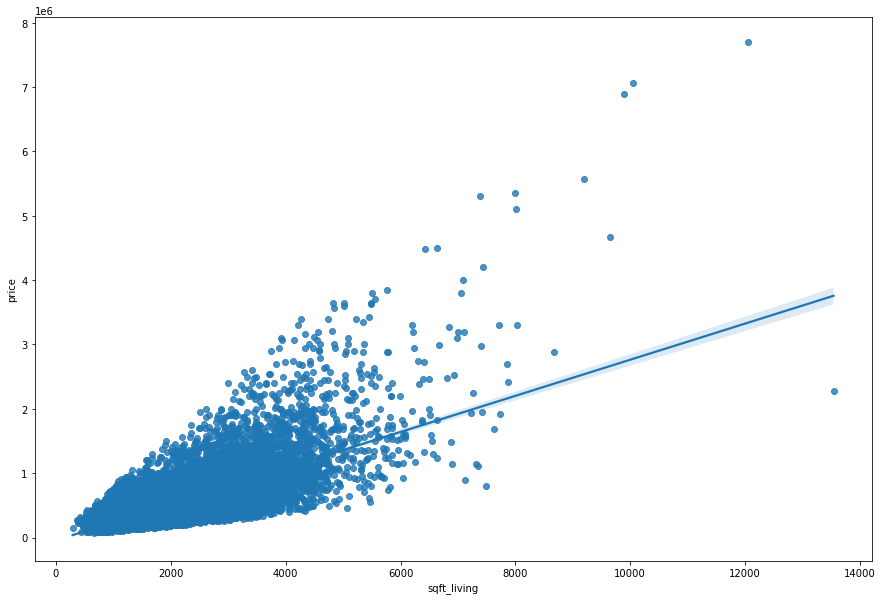

In [20]:
plt.figure(figsize=(width, height))
sns.regplot(x='sqft_living', y='price', data=data)

In [21]:
data.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

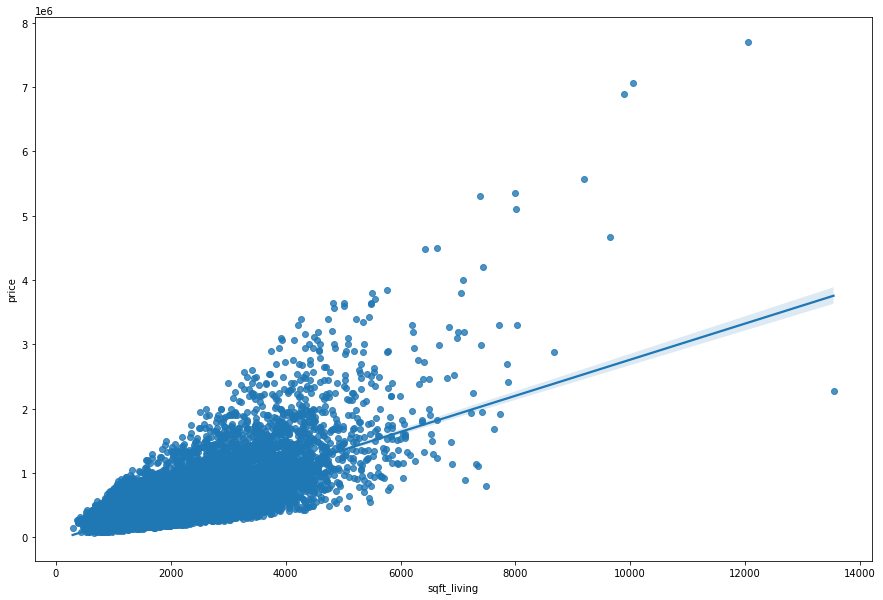

In [22]:
plt.figure(figsize=(15,10))
sns.regplot(x='sqft_living', y='price', data=data)

In [69]:
#Model Development 
#Linear Regression Approach - using sqft_living as the x variable to determine price as that has the highest corr 

x_train, x_test, y_train, y_test = train_test_split(data[['sqft_living']], data['price'], test_size=0.2, random_state=1)

In [70]:
LR = LinearRegression()
LR

LinearRegression()

In [71]:
LR.fit(x_train, y_train)

LinearRegression()

In [72]:
#Linear Regression Score
single_lr_score = LR.score(x_test, y_test)
single_lr_score

0.5033019006466928

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

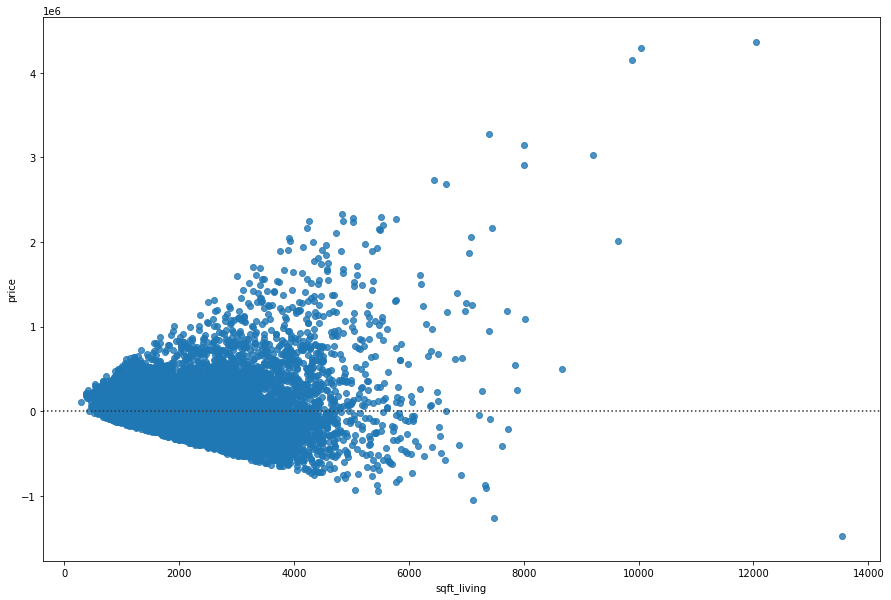

In [73]:
plt.figure(figsize=(15,10))
sns.residplot(x=data['sqft_living'], y=data['price'])

In [74]:
#Using Polynomial Regression to find if a better model is possible
R2scores = {}

for x in range(1,6):
    PF = PolynomialFeatures(degree=x)
    PR_train = PF.fit_transform(x_train)
    PR_test = PF.fit_transform(x_test)
    LR = LinearRegression()
    LR.fit(PR_train, y_train)
    score = LR.score(PR_test, y_test)
    R2scores[x] = score
    
R2scores

{1: 0.5033019006466926,
 2: 0.5347821529762198,
 3: 0.5567301337327412,
 4: 0.4916761879307564,
 5: -0.35060813974392757}

In [75]:
#Best Polynomial Degree is 3 from loop
print('Best Polynomial Degree:', max(R2scores, key=R2scores.get))
print('Best R2 Score:', max(R2scores.values()))
single_polynomial_score = max(R2scores.values())

Best Polynomial Degree: 3
Best R2 Score: 0.5567301337327412


In [76]:
#Cross Val with Linear Regression
lr = LinearRegression()
cross_val_lr = cross_val_score(lr, data[['sqft_living']], data['price'], cv=4)
cross_val_lr

array([0.48405393, 0.49342812, 0.4945384 , 0.49661067])

In [77]:
print('linear Regression Score mean', cross_val_lr.mean())
print('linear Regression Score mean', cross_val_lr.std())
single_cross_val_score = cross_val_lr.mean()

linear Regression Score mean 0.49215778141759514
linear Regression Score mean 0.004816164814374254


In [78]:
parameters1 = {'normalize': [True, False]}
parameters1

{'normalize': [True, False]}

In [79]:
Grid1 = GridSearchCV(lr, parameters1, cv=4)

In [80]:
Grid1.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=LinearRegression(),
             param_grid={'normalize': [True, False]})

In [81]:
Grid1.best_estimator_

LinearRegression(normalize=True)

In [82]:
Grid1.best_score_

0.48777174822727465

In [84]:
single_gridsearch_score = Grid1.score(x_test, y_test)
single_gridsearch_score

0.5033019006466926

In [35]:
#Multiple Line Regression Approach - using multiple features as the x variable to determine price
features = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] 
X = data[features]
Y = data['price']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [37]:
LR_features = LinearRegression()

In [38]:
LR_features.fit(x_train, y_train)

LinearRegression()

In [39]:
#Multiline Regression Score
multiple_lr_score = LR_features.score(x_test, y_test)
multiple_lr_score

0.645921706963599

In [40]:
#Cross-validation with MultiLine Reg approach
LR_features_cross_val = LinearRegression()
cross_val_multi_lr = cross_val_score(LR_features_cross_val, X, Y, cv=4)
cross_val_multi_lr

array([0.65014123, 0.64279637, 0.65591784, 0.66802221])

In [59]:
cross_val_multiple_score = cross_val_multi_lr.mean()
print('Multiple line linear Regression Score mean', cross_val_multi_lr.mean())
print('Multiple line linear Regression Score mean', cross_val_multi_lr.std())

Multiple line linear Regression Score mean 0.6542194163354436
Multiple line linear Regression Score mean 0.009226583019816778


In [42]:
#Polynomial Regression on multiple features
multi_R2scores = {}
pbar = tqdm(range(1,5))

for x in pbar:
    PF = PolynomialFeatures(degree=x)
    PR_train = PF.fit_transform(x_train)
    PR_test = PF.fit_transform(x_test)
    LR = LinearRegression()
    LR.fit(PR_train, y_train)
    score = LR.score(PR_test, y_test)
    multi_R2scores[x] = score
    
multi_R2scores

100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.34it/s]


{1: 0.6459217069635563,
 2: 0.7632813034358027,
 3: 0.7099629117533517,
 4: -24.31912113827122}

In [43]:
#Best Polynomial Degree is 3 from loop
multiple_polynomial_score = max(multi_R2scores.values())
print('Best Polynomial Degree:', max(multi_R2scores, key=multi_R2scores.get))
print('Best R2 Score:', max(multi_R2scores.values()))

Best Polynomial Degree: 2
Best R2 Score: 0.7632813034358027


In [44]:
#Using Ridge Regression and Grid Search CV to potentially find better model
#Using it on the original data
RR = Ridge()
RR

Ridge()

In [45]:
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000, 1000], 'normalize': [True, False]}
parameters

{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000, 1000],
 'normalize': [True, False]}

In [46]:
Grid = GridSearchCV(RR, parameters, cv=4)

In [47]:
x_train

,floors,waterfront,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living
7291,1.0,0,47.5033,3.0,800,2,1.75,2180,1390,7,2190
14835,2.0,0,47.6503,3.0,0,0,2.50,1590,2370,9,2370
15880,1.0,0,47.6797,2.0,0,0,1.00,1610,1230,7,1230
8812,1.0,0,47.5973,4.0,310,0,2.25,3110,2200,9,2510
17220,1.0,0,47.7024,3.0,0,0,1.00,1800,1160,6,1160
...,...,...,...,...,...,...,...,...,...,...,...
10955,2.0,0,47.5538,3.0,0,0,2.50,2190,1920,8,1920
17289,3.0,0,47.6875,4.0,0,0,4.50,1360,3420,9,3420
5192,1.0,0,47.5936,3.0,400,0,1.75,2460,1570,8,1970
12172,1.0,0,47.7753,3.0,690,0,2.25,1550,1290,7,1980


In [48]:
Grid.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000,
                                   1000],
                         'normalize': [True, False]})

In [49]:
Grid.best_estimator_

Ridge(alpha=0.01, normalize=True)

In [50]:
Grid.score(x_test, y_test)

0.6454142120838824

In [51]:
PF = PolynomialFeatures(degree=2)
PF_train = PF.fit_transform(x_train)
PF_test = PF.fit_transform(x_test)
Grid2 = GridSearchCV(RR, parameters, cv=4)
Grid2

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000,
                                   1000],
                         'normalize': [True, False]})

In [52]:
Grid2.fit(PR_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000,
                                   1000],
                         'normalize': [True, False]})

In [53]:
Grid2.best_estimator_

Ridge(alpha=0.1, normalize=True)

In [55]:
multiple_gridsearch_score = Grid2.score(PR_test, y_test)
multiple_gridsearch_score

0.7303323273014724

In [86]:
#Pandas Dataframe showing the different r2 score results results
ind = ['Linear Regression', 'Multiple Line Regression']
comparison_dataframe = pd.DataFrame(data={'Simple Linear Regression': [single_lr_score, multiple_lr_score],
                                         'Polynomial Regression': [single_polynomial_score, multiple_polynomial_score],
                                         'Cross Val Mean Score': [single_cross_val_score, cross_val_multiple_score],
                                          'Grid Search CV': [single_gridsearch_score, multiple_gridsearch_score ]
                                         }, index = ind)

In [87]:
comparison_dataframe

,Simple Linear Regression,Polynomial Regression,Cross Val Mean Score,Grid Search CV
Linear Regression,0.503302,0.556730,0.492158,0.503302
Multiple Line Regression,0.645922,0.763281,0.654219,0.730332


In [ ]:
'''It seems the best model found with the closest R^2 score to 1 was was the Multiple Lines Polynomail
Regression model. '''